# **Assignment 2**

**# Ariel Siman Tov – 209499821 | Tal klien – 209234103 | Zohar Attar – 209230879 | Gaby Levis-332396282 | Yarden Tzaraf –319092268**


In [1]:
import pandas as pd
import numpy as np

In [2]:

# Load the CSV file into a DataFrame
original_df = pd.read_csv('startup data.csv')
pd.set_option('display.max_columns', None)
# Display the first few rows of the DataFrame
original_df.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


**summary of the dataset before cleaning:**

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

# **1. Data Collection**
**Source of our Data**
The dataset used for this project is sourced from Kaggle, a well-known platform for data science competitions and datasets. The specific dataset is titled "Startup Success Prediction," created by Manish KC.

**Why This Dataset is Suitable for our Problem**

This dataset is suitable for investigating the factors that most significantly influence the success of startups for several reasons:

*Relevance:* The dataset specifically focuses on various attributes of
startups, which are directly related to the problem of predicting
startup success.This relevance ensures that the features included are likely to provide insights into the success factors of startups.

*Comprehensiveness:* It includes a variety of features that are crucial for understanding different aspects of startups, such as funding, team composition, market size, and growth metrics.This diversity allows for a comprehensive analysis of multiple factors simultaneously, providing a holistic view of what drives startup success.

The feature called "status" determines for us whether a startup was successful or not. It has 2 possible values: closed/ acquired. When acquired signifies success and closed indicates lack of success. There are different features in our data and our job is to understand according to their values ​​and according to the state of the company which features are dominant for this question.






# **About the Data**

* Unnamed: 0: An index or unique identifier for each row in the dataset.
* state_code: The abbreviation of the state where the startup is located. It can reveal state-level support systems, regulations, and economic conditions impacting startup success.
* latitude: The latitude coordinate of the startup's location.
* longitude: The longitude coordinate of the startup's location.
* zip_code: The postal code of the startup's location.
* id: A unique identifier for each startup.
* city: The city where the startup is headquartered. This can provide insights into the geographic distribution of successful startups and regional trends.
* Unnamed: 6: Likely an additional identifier or index column, potentially a placeholder or a duplicate index.
* name: The name of the startup. It helps identify each unique entity in the dataset.
* labels: Labels indicating certain characteristics or categories relevant to the startup (e.g., industry sector).
* founded_at: The date when the startup was founded. This can help analyze the age and maturity of startups and their correlation with success.
* closed_at: The date when the startup ceased operations, if applicable.
* first_funding_at: The date of the startup's first funding round.
* last_funding_at: The date of the startup's most recent funding round. This can provide insights into the recent financial activity and momentum of the startup.
* age_first_funding_year: The startup's age at the time of its first funding round, in years.
* age_last_funding_year: The startup's age at the time of its most recent funding round, in years.
* age_first_milestone_year: The startup's age at the time of its first significant milestone, in years.
* age_last_milestone_year: The startup's age at the time of its most recent significant milestone, in years.
* relationships: The number of significant business relationships or partnerships the startup has formed.
* funding_rounds: The total number of funding rounds the startup has completed. More funding rounds can suggest sustained investor interest and confidence in the startup.
* funding_total_usd: The total amount of funding received by the startup, in US dollars. Higher funding levels often indicate greater resources for growth and development.
* milestones: The number of significant milestones the startup has achieved.
* state_code.1: A duplicated or related state code field, potentially indicating additional or corrected information.
* is_CA: A binary indicator (1 or 0) denoting whether the startup is located in California.
* is_NY: A binary indicator (1 or 0) denoting whether the startup is located in New York.
* is_MA: A binary indicator (1 or 0) denoting whether the startup is located in Massachusetts.
* is_TX: A binary indicator (1 or 0) denoting whether the startup is located in Texas.
* is_otherstate: A binary indicator (1 or 0) denoting whether the startup is located in any state other than CA, NY, MA, or TX.
* category_code: The industry sector or category to which the startup belongs. Different industries have varying levels of competitiveness, market size, and growth potential.
* is_software: A binary indicator (1 or 0) denoting whether the startup operates in the software industry.
* is_web: A binary indicator (1 or 0) denoting whether the startup operates in the web industry.
* is_mobile: A binary indicator (1 or 0) denoting whether the startup operates in the mobile industry.
* is_enterprise: A binary indicator (1 or 0) denoting whether the startup operates in the enterprise sector.
* is_advertising: A binary indicator (1 or 0) denoting whether the startup operates in the advertising industry.
* is_gamesvideo: A binary indicator (1 or 0) denoting whether the startup operates in the games or video industry.
* is_ecommerce: A binary indicator (1 or 0) denoting whether the startup operates in the e-commerce industry.
* is_biotech: A binary indicator (1 or 0) denoting whether the startup operates in the biotech industry.
* is_consulting: A binary indicator (1 or 0) denoting whether the startup operates in the consulting industry.
* is_othercategory: A binary indicator (1 or 0) denoting whether the startup operates in an industry not listed in the other specific categories.
* object_id: A unique identifier for each record, potentially used for linking related data.
* has_VC: A binary indicator (1 or 0) denoting whether the startup has received venture capital funding.
* has_angel: A binary indicator (1 or 0) denoting whether the startup has received angel investment.
* has_roundA: A binary indicator (1 or 0) denoting whether the startup has completed a Series A funding round.
* has_roundB: A binary indicator (1 or 0) denoting whether the startup has completed a Series B funding round.
* has_roundC: A binary indicator (1 or 0) denoting whether the startup has completed a Series C funding round.
* has_roundD: A binary indicator (1 or 0) denoting whether the startup has completed a Series D funding round.
* avg_participants: The average number of participants in the startup's funding rounds.
* is_top500: A binary indicator (1 or 0) denoting whether the startup is ranked among the top 500 startups in a relevant list.
* status: The current status of the startup, such as active, acquired, or closed. This is a direct indicator of the startup's success or failure.

# **Data Cleaning**

**Handle missing values**

In [4]:
# Display the number of missing values for each feature
missing_values = original_df.isnull().sum()

# Display the result
print("Number of missing values for each feature:")
print(missing_values)

Number of missing values for each feature:
Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                  

**Explnation:**

After checking the missing values, we saw that the feature closed_at has a significant number of missing values (more than 60%). Since this feature reflects only on the closed startups and does not add more information about the other startups, we decided to remove this feature.

In addition, the feature Unnamed: 6 also has a lot of missing data, but we will focus on it during the duplicates removal process.

The features age_first_milestone_year and age_last_milestone_year both have 152 null values. Due to the characteristics of these features, we decided to fill the empty records with a default value of 0.

We also have 1 missing value in the state_code.1 featuer but like the unnamed: 6 feature this feature is duplicate and will be drop.


In [5]:
clean_df = original_df.drop(columns=['closed_at'])

# Fill missing values in 'age_first_milestone_year' and 'age_last_milestone_year' with 0
clean_df['age_first_milestone_year'] = clean_df['age_first_milestone_year'].fillna(0)
clean_df['age_last_milestone_year'] = clean_df['age_last_milestone_year'].fillna(0)

**Remove duplicates:**


In [6]:
# Get the count of records for each unique value in 'state_code'
state_code_counts = clean_df['state_code'].value_counts()

# Get the count of records for each unique value in 'category_code'
category_code_counts = clean_df['category_code'].value_counts()

# Display the results
print("Number of records in each 'state_code':")
print(state_code_counts)

print("\nNumber of records in each 'category_code':")
print(category_code_counts)

Number of records in each 'state_code':
state_code
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: count, dtype: int64

Number of records in each 'category_code':
category_code
software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
ecommerce            25
public_relations     25
cleantech            23
security             19
analytics            19
social               14
search               12
other                11
messaging            11
fashion               8
travel                8
news       

after explored the dataset deeply we saw that there are some fetures that are duplicates and are not add any new information about the data:

We identified that unnamed 6 is a column that provides information about the location of the startup, but this location is represented by other features that are: city, id and zip_code. Therefore, we will remove this column because it does not provide new information.

In addition, we identified that state_code.1 is also a duplicate column, so we will remove it as well.

There are 3 different columns of the company's unique identifier. We will leave only the id and delete the features object_id and unnamed:0.

The feature first_funding_at exists 3 times when each column has a difference of one day, so we can only leave one column.

Regarding features state_code and category code, according to the summary we presented, it can be seen that there are many unique values, but there is not a high number of records in all these values.
In addition, the data comes with binary columns for the values ​​in these features, so we will delete them and perform 1-hot-encoding in the next step according to the 10 most common values ​​in the data, and the rest will be classified as others.

In [7]:
#Drop the specified columns
columns_to_drop = [
    'Unnamed: 6', 'state_code.1', 'object_id', 'Unnamed: 0', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
    'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
    'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'
]

clean_df = clean_df.drop(columns=columns_to_drop)

In [8]:
#remove duplicate columns
clean_df = clean_df.loc[:, ~clean_df.columns.duplicated()]

**Correct any data types or inconsistencies**

At this stage we will perform 1-hot-encoding according to the top 10 most common values ​​in the following features: state_code, category_code

In [9]:
# Get the top 10 most common values for 'state_code' and 'category_code'
top_10_state_codes = clean_df['state_code'].value_counts().index[:10]
top_10_category_codes = clean_df['category_code'].value_counts().index[:10]

# One-hot encode the top 10 most common values for 'state_code'
for state in top_10_state_codes:
    clean_df[f'is_{state}'] = (clean_df['state_code'] == state).astype(int)

# One-hot encode the top 10 most common values for 'category_code'
for category in top_10_category_codes:
    clean_df[f'is_{category}'] = (clean_df['category_code'] == category).astype(int)

# Display the first few rows of the DataFrame to verify the changes
# clean_df.head()


After adding these columns we will delete the features state_code and category_code

In [10]:
# Delete the original 'state_code' and 'category_code' features
clean_df = clean_df.drop(columns=['state_code', 'category_code'])

# Display the first few rows of the DataFrame to verify the changes
# clean_df.head()


Now, in the id feature we will delete the prefix "c:" and change it to int

In [11]:
# Remove the prefix 'c:' from the 'id' feature and convert it to int
clean_df['id'] = clean_df['id'].str.replace('c:', '').astype(int)

# Display the first few rows of the DataFrame to verify the changes
# clean_df.head()

Now, we would like to create a new column that will represent the seniority of the company (in years) and it will be calculated according to the feature founded_at.
In addition, we would like to extract the year from the following features: founded_at, first_funding_at and last_funding_at.

In [12]:
# Convert 'founded_at', 'first_funding_at', and 'last_funding_at' to datetime
clean_df['founded_at'] = pd.to_datetime(clean_df['founded_at'], errors='coerce')
clean_df['first_funding_at'] = pd.to_datetime(clean_df['first_funding_at'], errors='coerce')
clean_df['last_funding_at'] = pd.to_datetime(clean_df['last_funding_at'], errors='coerce')

# Create the 'Seniority' column
current_year = pd.Timestamp.now().year
clean_df['Seniority'] = current_year - clean_df['founded_at'].dt.year

# Extract the year and convert to int
clean_df['founded_at'] = clean_df['founded_at'].dt.year.astype('Int64')
clean_df['first_funding_at'] = clean_df['first_funding_at'].dt.year.astype('Int64')
clean_df['last_funding_at'] = clean_df['last_funding_at'].dt.year.astype('Int64')

# Display the first few rows of the DataFrame to verify the changes
# clean_df.head()

Now we would like to change the following features to int: age_first_funding_year, age_last_funding_year, age_first_milestone_year and age_last_milestone_year.
In addition, we noticed that while it is about the company's age at a certain time, there are negative values ​​in some of the records, which does not make sense, so we assume that it is a typing error, so we will turn the negative values ​​into their absolute value.

In [13]:
# Convert specified features to int and change negative values to their absolute value
features_to_convert = [
    'age_first_funding_year', 'age_last_funding_year',
    'age_first_milestone_year', 'age_last_milestone_year'
]

for feature in features_to_convert:
    clean_df[feature] = clean_df[feature].abs().astype(int)

# Display the first few rows of the DataFrame to verify the changes
# clean_df.head()

We will change the target variable "status" to a numeric binary variable
As follows: 1- acquired, 0- closed

In [14]:
# Change the target variable 'status' to numeric binary variable
clean_df['status'] = clean_df['status'].map({'acquired': 1, 'closed': 0})

# Display the first few rows of the DataFrame to verify the changes
# clean_df.head()

In addition, we deleted the following features: latitude longitude zip_code. We decided this because they do not contribute anything to our research question.

In [15]:
columns_to_drop = [
    'latitude', 'longitude', 'zip_code', 'labels'
]

clean_df = clean_df.drop(columns=columns_to_drop)

In [16]:
clean_df.head()

,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,is_CA,is_NY,is_MA,is_TX,is_WA,is_CO,is_IL,is_PA,is_VA,is_GA,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_games_video,is_semiconductor,is_network_hosting,is_biotech,is_hardware,Seniority
0,6669,San Diego,Bandsintown,2007,2009,2010,2,3,4,6,3,3,375000,3,0,1,0,0,0,0,1.0000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
1,16283,Los Gatos,TriCipher,2000,2005,2009,5,9,7,7,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24
2,65620,San Diego,Plixi,2009,2010,2010,1,1,1,2,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15
3,42668,Cupertino,Solidcore Systems,2002,2005,2007,3,5,6,6,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22
4,65806,San Francisco,Inhale Digital,2010,2010,2012,0,1,0,0,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,14


**summary of the dataset after cleaning:**

In [17]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        923 non-null    int64  
 1   city                      923 non-null    object 
 2   name                      923 non-null    object 
 3   founded_at                923 non-null    Int64  
 4   first_funding_at          923 non-null    Int64  
 5   last_funding_at           923 non-null    Int64  
 6   age_first_funding_year    923 non-null    int64  
 7   age_last_funding_year     923 non-null    int64  
 8   age_first_milestone_year  923 non-null    int64  
 9   age_last_milestone_year   923 non-null    int64  
 10  relationships             923 non-null    int64  
 11  funding_rounds            923 non-null    int64  
 12  funding_total_usd         923 non-null    int64  
 13  milestones                923 non-null    int64  
 14  has_VC    

# Part 3: **EDA** - Exploratory Data Analysis


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_drop_for_stats = ['id', 'name']
df_for_eda = clean_df.drop(columns=cols_to_drop_for_stats)

# Summary Statistics
summary_stats = df_for_eda.describe(include='all')

# Correlation Matrix
numeric_cols = df_for_eda.select_dtypes(include=['int64', 'float64', 'Int64']).columns
correlation_matrix = df_for_eda[numeric_cols].corr()

In [19]:
# Display summary statistics
summary_stats = df_for_eda.describe(include='number')
summary_stats

,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,is_CA,is_NY,is_MA,is_TX,is_WA,is_CO,is_IL,is_PA,is_VA,is_GA,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_games_video,is_semiconductor,is_network_hosting,is_biotech,is_hardware,Seniority
count,923.0,923.0,923.0,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,2005.496208,2007.475623,2009.16143,1.884074,3.501625,2.401950,3.681473,7.710726,2.310943,2.541975e+07,1.841820,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804,0.528711,0.114843,0.089924,0.045504,0.045504,0.020585,0.019502,0.018418,0.014085,0.011918,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.037920,0.036836,0.036836,0.029252,18.503792
std,3.528738,2.293583,2.175327,2.400876,2.910216,2.749852,3.259951,7.265776,1.390922,1.896344e+08,1.322632,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222,0.499446,0.319005,0.286228,0.208519,0.208519,0.142067,0.138355,0.134531,0.117903,0.108574,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.191106,0.188462,0.188462,0.168605,3.528738
min,1984.0,2000.0,2001.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,2003.0,2006.0,2008.0,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
50%,2006.0,2007.0,2009.0,1.000000,3.000000,2.000000,3.000000,5.000000,2.000000,1.000000e+07,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
75%,2008.0,2009.0,2011.0,3.000000,5.000000,4.000000,6.000000,10.000000,3.000000,2.472500e+07,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
max,2013.0,2013.0,2013.0,21.000000,21.000000,24.000000,24.000000,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


In [20]:
# Display summary statistics
summary_stats = df_for_eda.describe(include='object')
summary_stats

,city
count,923
unique,221
top,San Francisco
freq,128


<Figure size 1200x800 with 0 Axes>

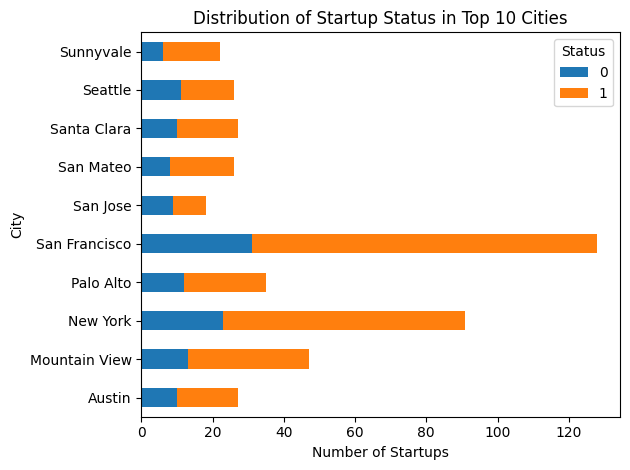

In [21]:
# Count the number of startups in each city
city_counts = df_for_eda['city'].value_counts()

# Select the top 10 cities
top_10_cities = city_counts.head(10).index

# Filter the data for the top 10 cities
df_top_10_cities = df_for_eda[df_for_eda['city'].isin(top_10_cities)]

# Count the number of startups in each city and their status
city_status_counts = df_top_10_cities.groupby(['city', 'status']).size().unstack()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
city_status_counts.plot(kind='barh', stacked=True)
plt.xlabel('Number of Startups')
plt.ylabel('City')
plt.title('Distribution of Startup Status in Top 10 Cities')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# Some insights that can be derived from the statistics above:

**Geographical Distribution:**

Top Locations: The most frequent city in the dataset is San Francisco, suggesting it has the highest concentration of startups among the listed cities.

**Temporal Analysis:**

1. Founded At:The startups were founded between 1984 and 2013, with a mean founding year around 2005.

2. First Funding At and Last Funding At: The first and last funding rounds occurred between 2000 and 2013, with startups generally receiving their first funding slightly after being founded and their last funding around 2009.

**Financial Metrics:**

1. Funding Rounds:Startups have gone through multiple funding rounds on average (mean of 3.50 rounds).

2. Funding Total USD: The total funding raised by startups varies significantly (mean around 25.42 million USD), with some outliers raising up to 5.7 billion USD.

**Status and Attributes:**

Status: Most startups in the dataset did not acquired


**Investment and Partnerships:**

1. Investment Participation: A significant portion of startups have received funding from venture capital (VC) or angel investors, with varying levels of participation up to multiple rounds (A to D).

2. Partnerships: Startups have engaged in multiple relationships, mean of 7.7 significant business relationships or partnerships the startup has formed.

**Regional Insights:**

State Representation: California (CA) being the most prominent state for startups.

**Technological Domains:**

Technology Focus: Startups in the dataset are involved in diverse technological domains such as software, web, mobile, enterprise, biotech, advertising, games/video, hardware, and semiconductor are also represented among the startups.

The most popular domains are software and web.

In [22]:
binary_cols = [ 'status','has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
               'has_roundD', 'is_top500', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
               'is_WA', 'is_CO', 'is_IL', 'is_PA', 'is_VA', 'is_GA', 'is_software',
               'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_games_video',
               'is_semiconductor', 'is_network_hosting', 'is_biotech', 'is_hardware']

# Initialize an empty DataFrame to store the counts
count_df = pd.DataFrame(columns=binary_cols)

# Iterate through each binary column and populate count_df
for col in binary_cols:
    counts = df_for_eda[col].value_counts()
    count_df.loc['count 0', col] = counts.get(0, 0)
    count_df.loc['count 1', col] = counts.get(1, 0)

# Display the count DataFrame
count_df

,status,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500,is_CA,is_NY,is_MA,is_TX,is_WA,is_CO,is_IL,is_PA,is_VA,is_GA,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_games_video,is_semiconductor,is_network_hosting,is_biotech,is_hardware
count 0,326,622,688,454,561,708,831,176,435,817,840,881,881,904,905,906,910,912,770,779,844,850,861,871,888,889,889,896
count 1,597,301,235,469,362,215,92,747,488,106,83,42,42,19,18,17,13,11,153,144,79,73,62,52,35,34,34,27


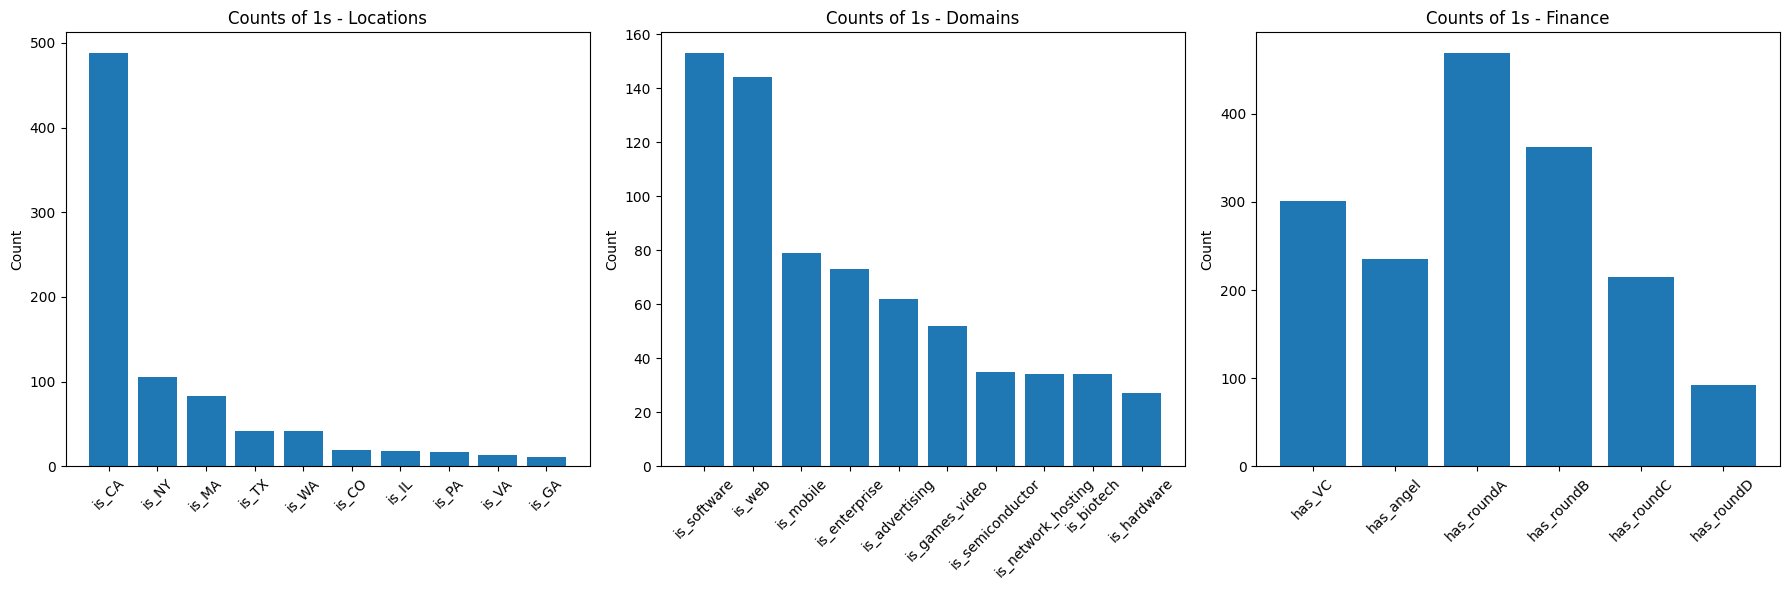

In [23]:
# Define the categories of columns
locations = [ 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_WA',
             'is_CO', 'is_IL', 'is_PA', 'is_VA', 'is_GA']

domain = ['is_software', 'is_web', 'is_mobile', 'is_enterprise',
          'is_advertising', 'is_games_video', 'is_semiconductor', 'is_network_hosting',
          'is_biotech', 'is_hardware']

finance = ['has_VC', 'has_angel', 'has_roundA', 'has_roundB',
           'has_roundC', 'has_roundD']

# Create figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for locations
axs[0].bar(locations, [count_df.loc['count 1', col] for col in locations])
axs[0].set_title('Counts of 1s - Locations')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot for domain
axs[1].bar(domain, [count_df.loc['count 1', col] for col in domain])
axs[1].set_title('Counts of 1s - Domains')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

# Plot for finance
axs[2].bar(finance, [count_df.loc['count 1', col] for col in finance])
axs[2].set_title('Counts of 1s - Finance')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## As we see - most of the startups in the dataset are:
*  software and web startups come from California state
* come form California state
* had round A and B

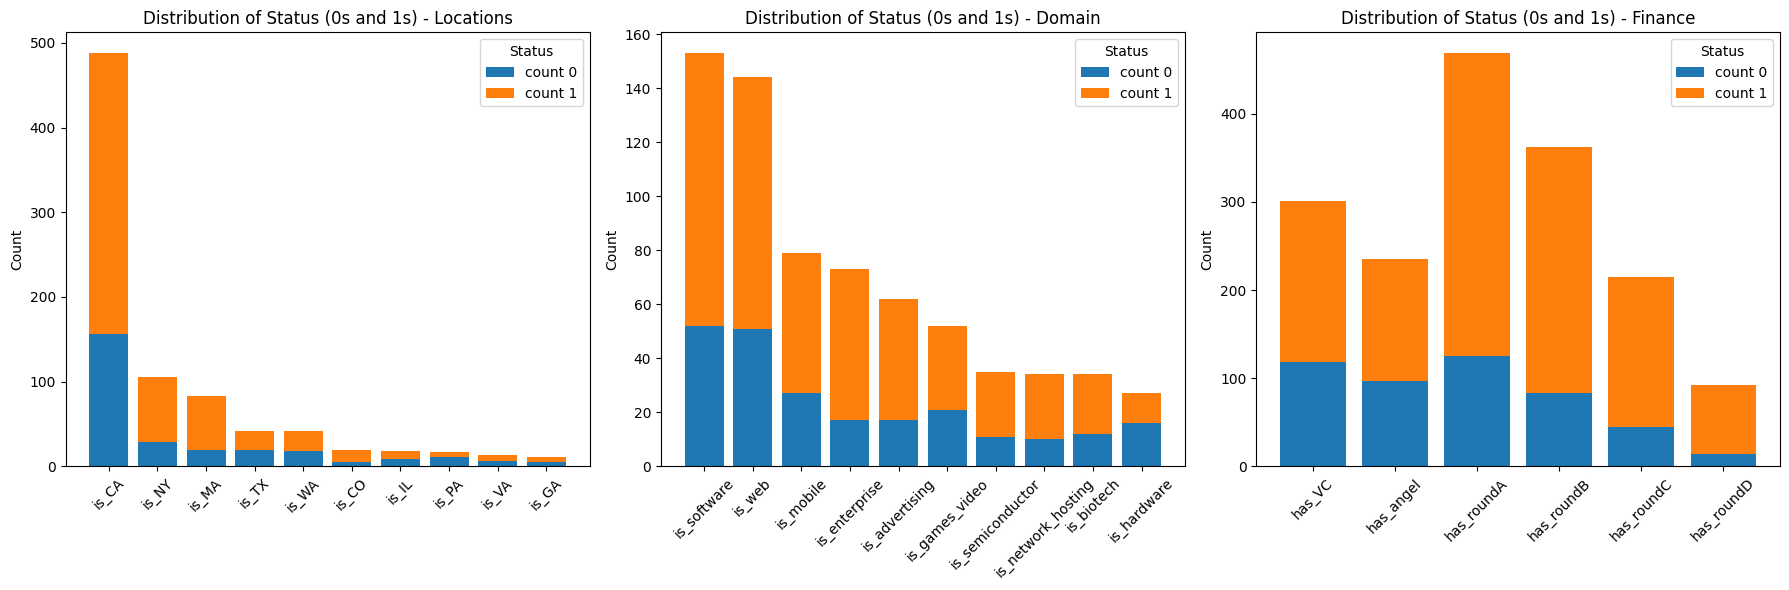

In [24]:
def plot_stacked_bars(categories, title, ax):
    # Create a new DataFrame to hold the counts
    counts_df = pd.DataFrame(index=['count 0', 'count 1'], columns=categories)

    # Calculate counts of 1s for each category column and status distribution
    for col in categories:
        if col == 'status':
            counts_df.loc['count 0', col] = sum(clean_df[col] == 0)
            counts_df.loc['count 1', col] = sum(clean_df[col] == 1)
        else:
            counts_df.loc['count 0', col] = sum((clean_df[col] == 1) & (clean_df['status'] == 0))
            counts_df.loc['count 1', col] = sum((clean_df[col] == 1) & (clean_df['status'] == 1))

    # Convert counts to integers (if needed)
    counts_df = counts_df.astype(int)

    # Plotting stacked bars
    bottom = None
    for idx, row in counts_df.iterrows():
        ax.bar(counts_df.columns, row, label=idx, bottom=bottom)
        if bottom is None:
            bottom = row
        else:
            bottom += row

    ax.set_title(f'Distribution of Status (0s and 1s) - {title}')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Status')

# Create figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for locations
plot_stacked_bars(locations, 'Locations', axs[0])

# Plot for domain
plot_stacked_bars(domain, 'Domain', axs[1])

# Plot for finance
plot_stacked_bars(finance, 'Finance', axs[2])

# Adjust layout and display plot
plt.tight_layout()
plt.show()


We observe that the majority of startups across various domains, states, and financial perspectives have closed.

Additionally, from the left chart, it is apparent that startups which had Series A funding rounds were predominantly acquired, a trend that similarly applies to Series B, C, and D funding rounds.

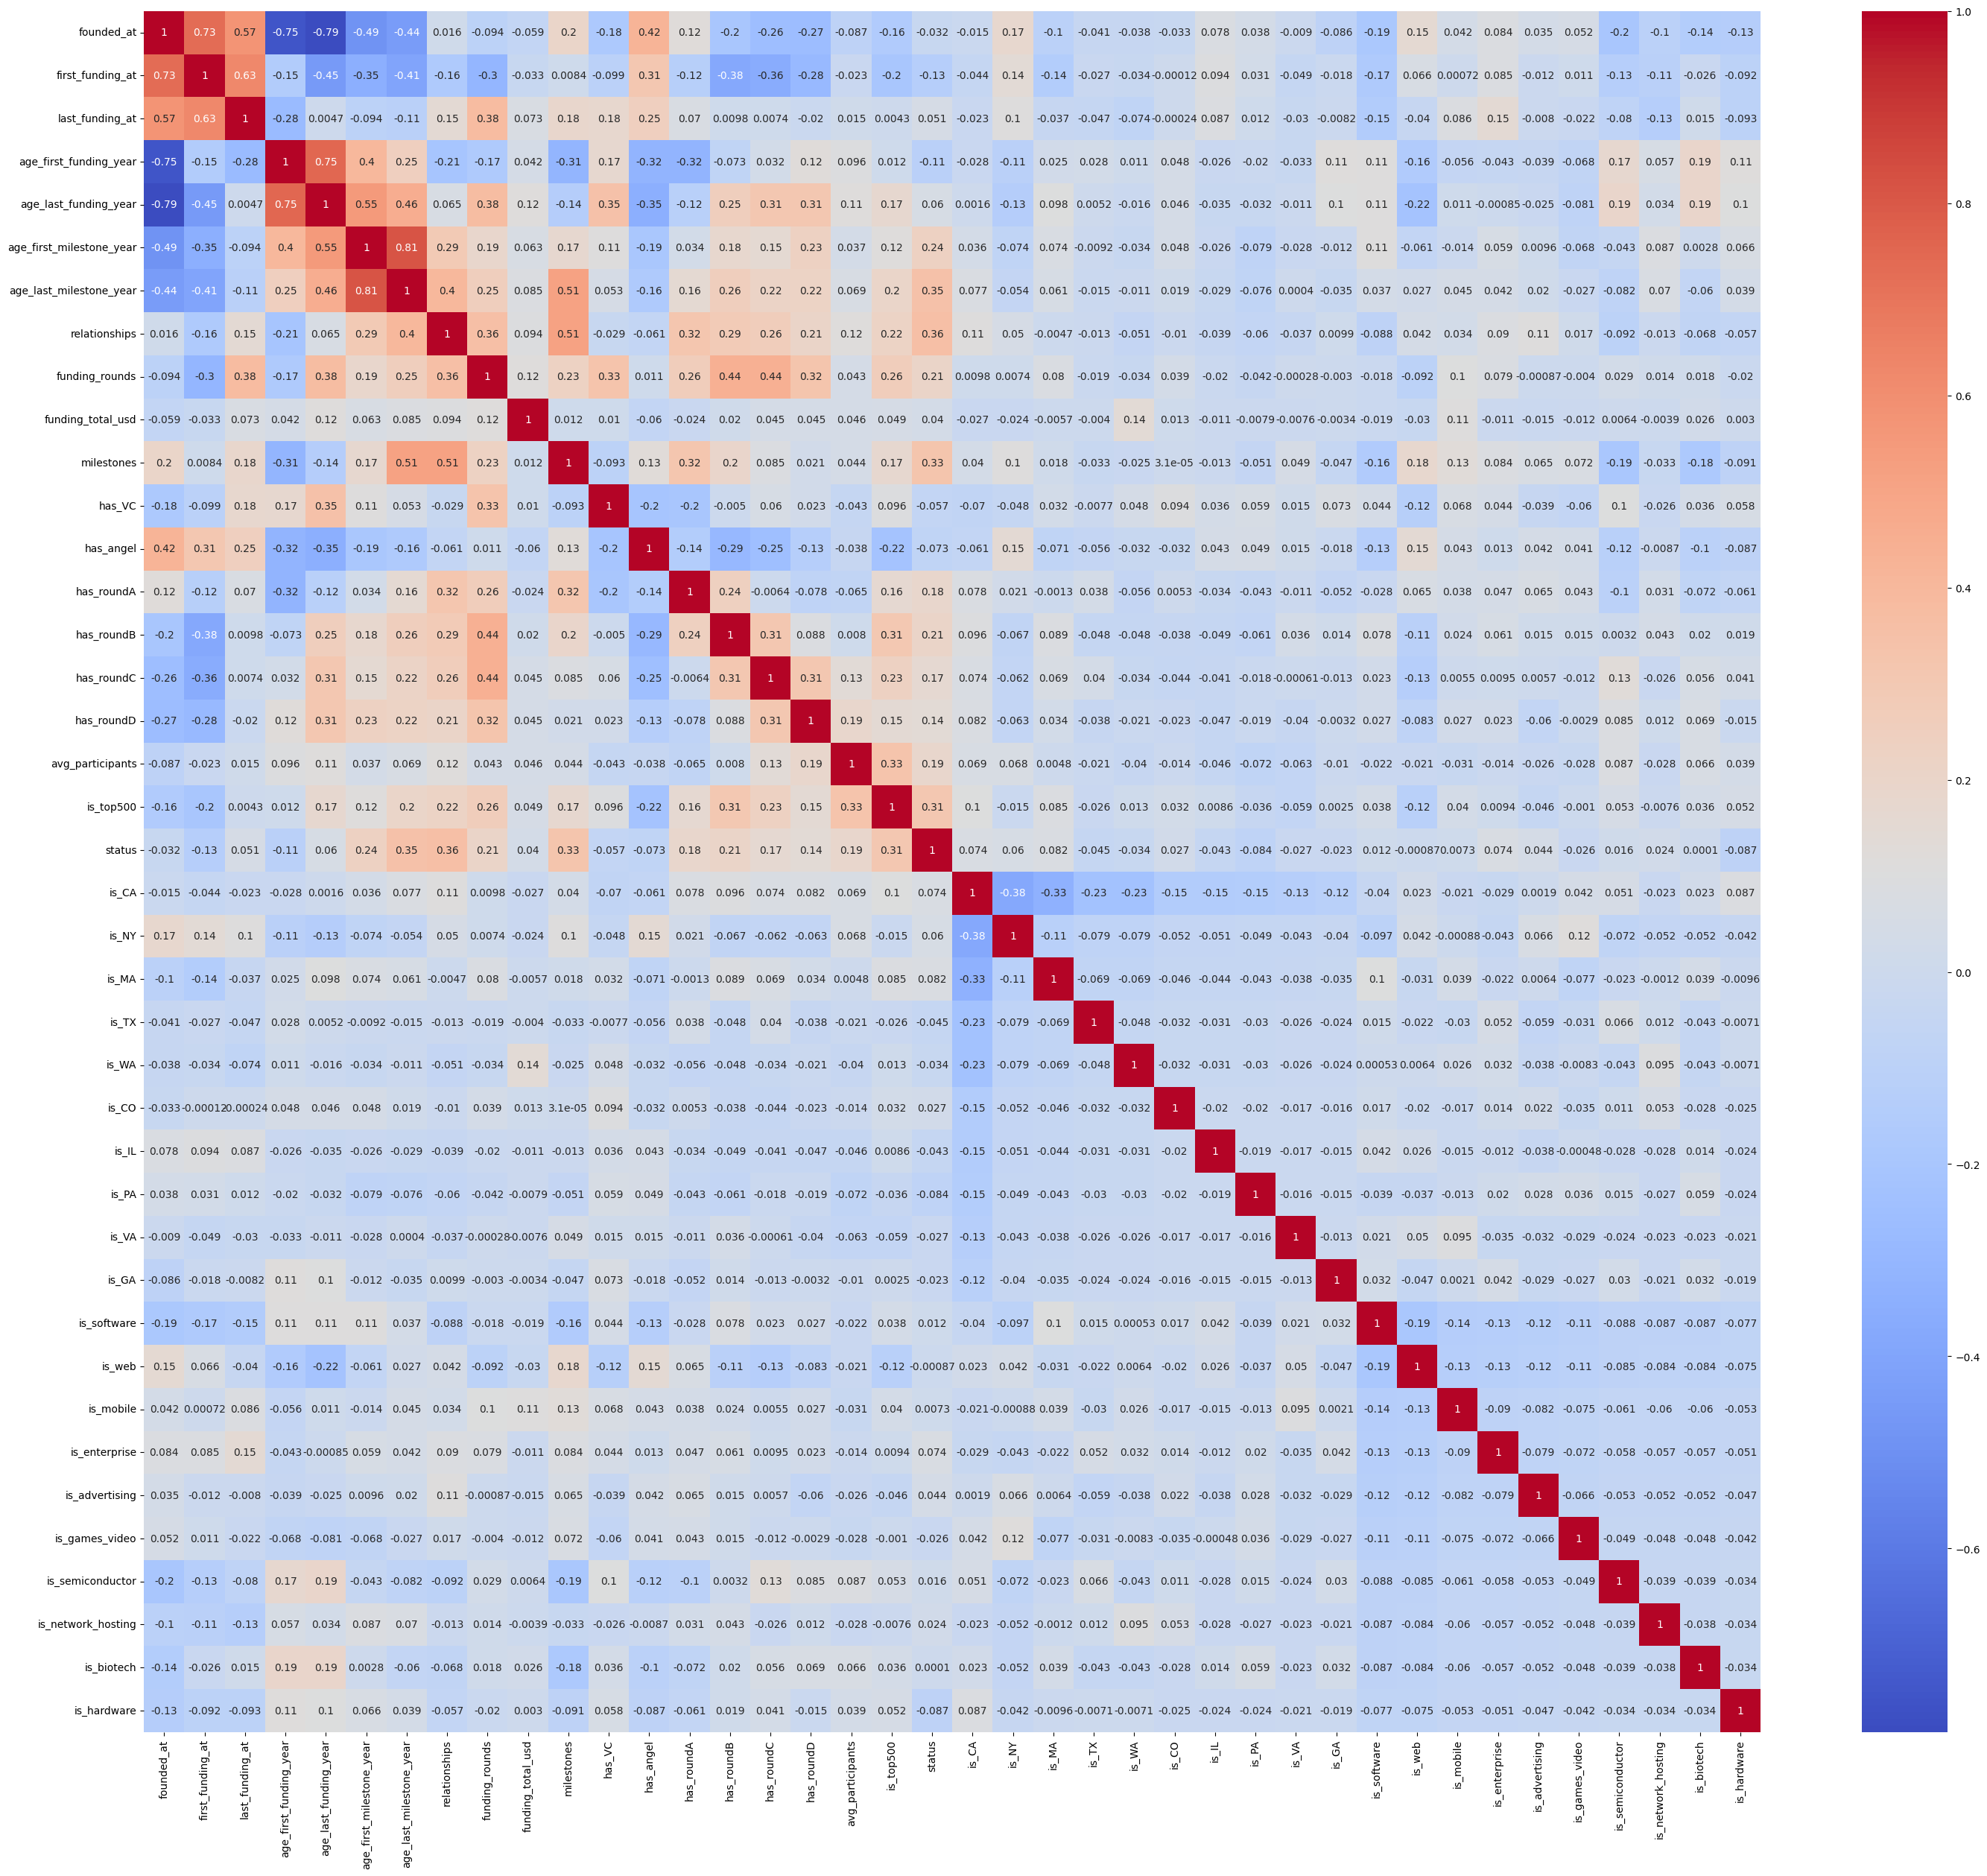

In [25]:
# Heatmap of the correlation matrix
plt.figure(figsize=(35, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# The significant correlations
A correlation of -0.79 between **founded_at** and **age_last_funding_year** indicates a strong negative relationship. This means  Startups founded in more recent years naturally have a lower age at their last funding year because they have had less time to accumulate years since their founding.

We can see high positive correlation of 0.81 between **age_first_milestone_year** and **age_last_milestone_year**

The high correlation indicates that for many startups, the time between their first significant milestone and their last significant milestone is relatively short. This could mean that startups either achieve their key milestones quickly or fail to achieve further milestones after their initial success.

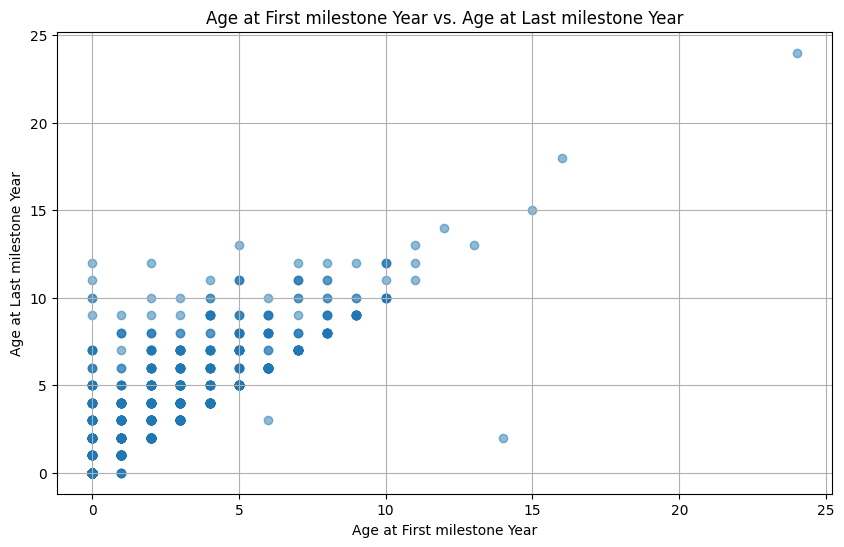

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df_for_eda['age_first_milestone_year'], df_for_eda['age_last_milestone_year'], alpha=0.5)
plt.title('Age at First milestone Year vs. Age at Last milestone Year')
plt.xlabel('Age at First milestone Year')
plt.ylabel('Age at Last milestone Year')
plt.grid(True)
plt.show()

More over, a high correlation of 0.75 between the **founded_at** and **first_funding_year** variables indicates that the year in which a startup was founded is closely related to the year in which it received its first funding. This correlation suggests that startups typically secure their first round of funding relatively soon after being founded.

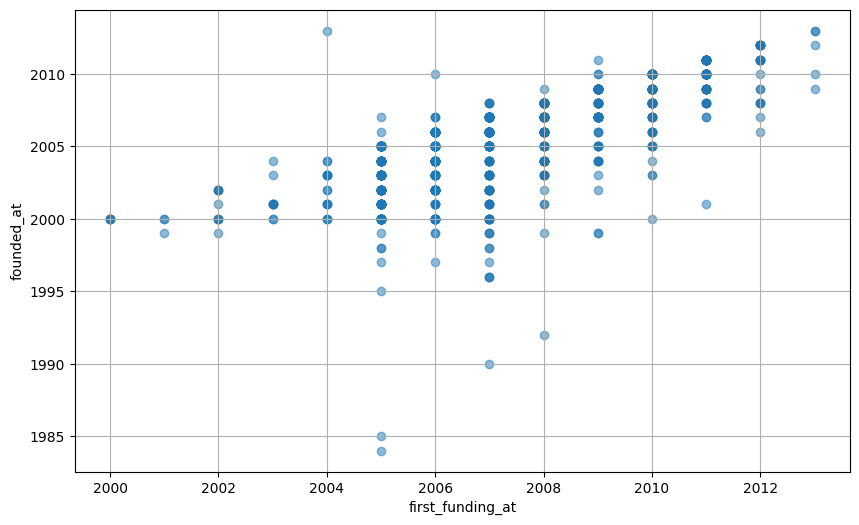

In [27]:
import matplotlib.pyplot as plt

# Example assuming your data is in a DataFrame named df
plt.figure(figsize=(10, 6))
plt.scatter(df_for_eda['first_funding_at'], df_for_eda['founded_at'], alpha=0.5)
plt.xlabel('first_funding_at')
plt.ylabel('founded_at')
plt.grid(True)
plt.show()


<Figure size 2000x1500 with 0 Axes>

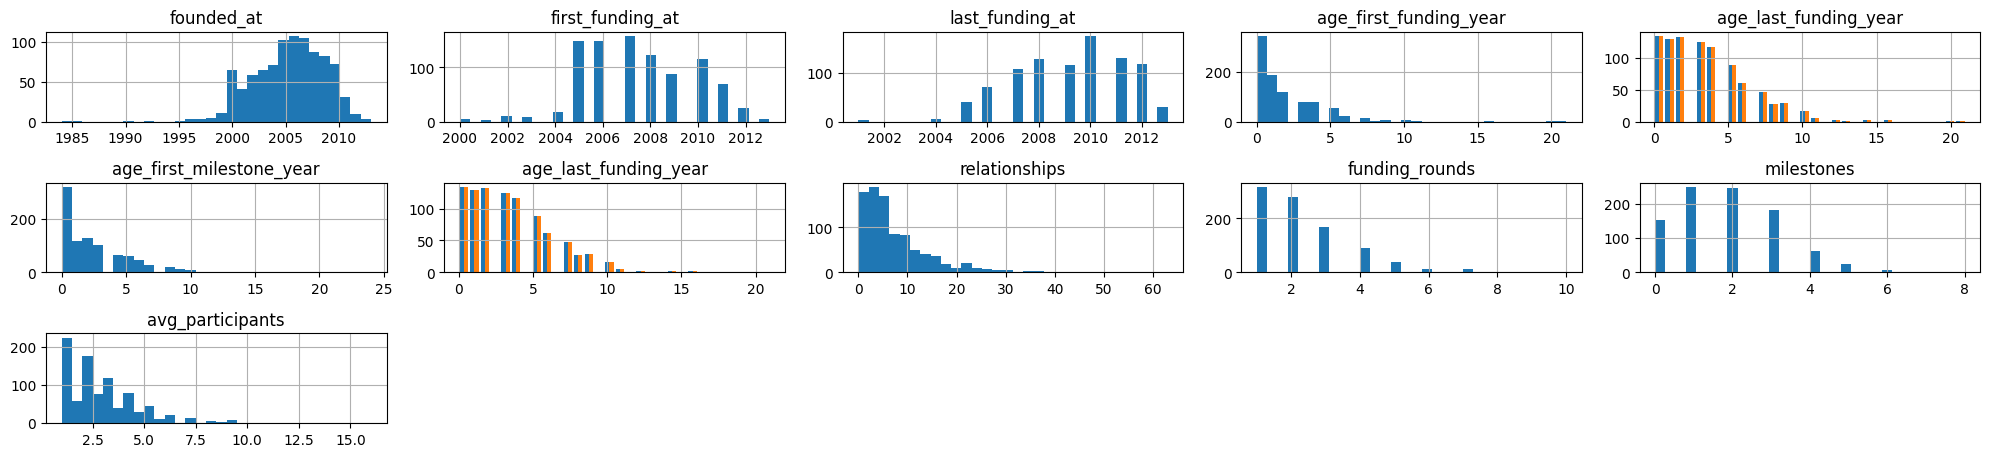

In [28]:
# Visualizations
plt.figure(figsize=(20, 15))
cols_to_hist = ['founded_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'milestones', 'avg_participants']
# Histograms for numerical columns
df_for_eda[cols_to_hist].hist(bins=30, figsize=(20, 15), layout=(10, 5))
plt.tight_layout()
plt.show()

The histograms of the numerical features provide the following significant insights:

1. **Founding Year (`founded_at`)**:
   - Most startups were founded around 2005, displaying a normal distribution with a peak around this period.

2. **First Funding Year (`first_funding_at`)**:
   - The distribution of first funding years also shows a peak around 2006 to 2008, suggesting that many startups received their initial funding during these years.

3. **Last Funding Year (`last_funding_at`)**:
   - Similar to the first funding year, the last funding year peaks around 2008 to 2010, indicating that many startups received their final rounds of funding during this period.

4. **Age at First Funding Year (`age_first_funding_year`)**:
   - Most startups received their first funding within 0 to 2 years of being founded, indicating quick initial investment for many startups.

5. **Age at Last Funding Year (`age_last_funding_year`)**:
   - The age at last funding year ranges widely, but many startups receive their last funding within the first 5 years. There are fewer startups that continue to receive funding beyond this period.

6. **Age at First Milestone Year (`age_first_milestone_year`)**:
   - The majority of startups achieve their first milestone within the first 5 years, with the highest concentration around 0 to 2 years.

7. **Relationships (`relationships`)**:
   - The number of relationships (such as partnerships or investments) shows a right-skewed distribution. Most startups have fewer than 20 relationships, with a few outliers having significantly more.

8. **Funding Rounds (`funding_rounds`)**:
   - The number of funding rounds for most startups is around 2 to 4. There are fewer startups with higher numbers of funding rounds, and some outliers with up to 10 rounds.

9. **Milestones (`milestones`)**:
   - Most startups achieve around 1 to 3 milestones. The distribution shows that achieving more than 5 milestones is less common.

10. **Average Participants (`avg_participants`)**:
    - The average number of participants in funding rounds is mostly below 5. There are fewer instances with a higher number of participants, with some outliers reaching up to 15 participants.

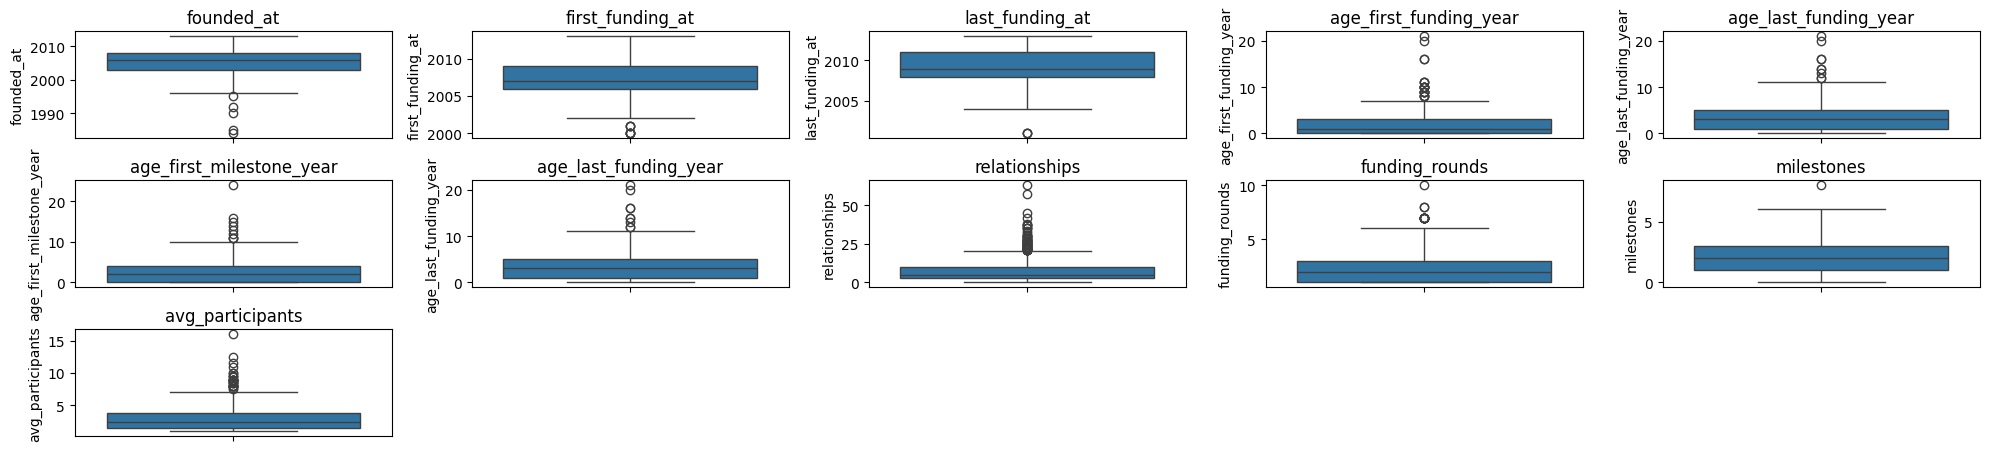

In [29]:
# Box Plots for numerical columns to detect outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols_to_hist):
    plt.subplot(10, 5, i + 1)
    sns.boxplot(y=df_for_eda[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The significant insights from the box plots:

1. **Founding Year (`founded_at`)**:
   - Most startups were founded between 1995 and 2010.
   - There are a few outliers indicating startups founded before 1995.

2. **First Funding Year (`first_funding_at`)**:
   - The majority of startups received their first funding between 2005 and 2015.
   - There are some outliers with first funding before 2005.

3. **Last Funding Year (`last_funding_at`)**:
   - Similar to the first funding year, most last funding years are between 2005 and 2015.
   - Outliers are present for startups that received last funding before 2005.

4. **Age at First Milestone Year (`age_first_milestone_year`)**:
   - Most startups achieve their first milestone within the first 5 years.
   - There are a few outliers where the first milestone is achieved after 10 years.

5. **Age at Last Funding Year (`age_last_funding_year`)**:
   - Startups typically receive their last funding within the first 10 years.
   - Outliers show some startups receiving funding even after 20 years.

6. **Relationships (`relationships`)**:
   - The number of relationships (possibly partnerships or investments) varies widely, but most have fewer than 20.
   - There are several outliers with more than 20 relationships.

7. **Funding Rounds (`funding_rounds`)**:
   - Most startups have around 5 funding rounds.
   - Outliers include startups with up to 10 funding rounds.

8. **Milestones (`milestones`)**:
   - Startups generally achieve fewer than 10 milestones.
   - There are outliers with up to 15 milestones.

9. **Average Participants (`avg_participants`)**:
   - The number of average participants in funding rounds is usually below 10.
   - Outliers include startups with more than 15 participants.



# **Part 4: Feature Engineering**

In [30]:
FE_df = clean_df

**Add column "Company Age":** Calculate the age of the company at the time of it founded and the last funding time.

**Justification:** Older companies might have more stability and experience, which could be a factor in their success.

In [31]:
FE_df['company_age_when_last_funding'] = FE_df['last_funding_at'] - FE_df['founded_at']

**Add colum "Funding Frequency":** Calculate the frequency of funding rounds.

**Justification:** Companies that receive funding more frequently might be seen as more promising.

In [32]:
FE_df['funding_frequency'] = np.where(FE_df['company_age_when_last_funding'] == 0,  0, FE_df['funding_rounds'] / FE_df['company_age_when_last_funding'])

**Add column "Funding to Milestones Ratio:"** Ratio of total funding to number of milestones achieved.

**Justification:** This ratio can indicate the efficiency with which a company uses its funding to achieve milestones.

In [33]:
FE_df['funding_to_milestones_ratio'] = FE_df['funding_total_usd'] / FE_df['milestones']
FE_df['funding_to_milestones_ratio'] = np.where(np.isinf(FE_df['funding_to_milestones_ratio']), 0, FE_df['funding_to_milestones_ratio'])

In [34]:
FE_df

,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,is_CA,is_NY,is_MA,is_TX,is_WA,is_CO,is_IL,is_PA,is_VA,is_GA,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_games_video,is_semiconductor,is_network_hosting,is_biotech,is_hardware,Seniority,company_age_when_last_funding,funding_frequency,funding_to_milestones_ratio
0,6669,San Diego,Bandsintown,2007,2009,2010,2,3,4,6,3,3,375000,3,0,1,0,0,0,0,1.0000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,3,1.0,125000.0
1,16283,Los Gatos,TriCipher,2000,2005,2009,5,9,7,7,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,9,0.444444,40100000.0
2,65620,San Diego,Plixi,2009,2010,2010,1,1,1,2,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15,1,1.0,1300000.0
3,42668,Cupertino,Solidcore Systems,2002,2005,2007,3,5,6,6,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,22,5,0.6,40000000.0
4,65806,San Francisco,Inhale Digital,2010,2010,2012,0,1,0,0,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,14,2,1.0,1300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,21343,San Francisco,CoTweet,2009,2009,2009,0,0,0,4,9,1,1100000,2,0,0,1,0,0,0,6.0000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15,0,0,550000.0
919,41747,Burlington,Reef Point Systems,1998,2005,2007,7,9,6,6,1,3,52000000,1,1,0,0,1,0,0,2.6667,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,9,0.333333,52000000.0
920,31549,Sunnyvale,Paracor Medical,1999,2007,2007,8,8,9,9,5,1,44000000,1,0,0,0,0,0,1,8.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,25,8,0.125,44000000.0
921,33198,San Francisco,Causata,2009,2009,2011,0,2,0,3,12,2,15500000,2,0,0,1,1,0,0,1.0000,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15,2,1.0,7750000.0


# **Part 5: Model Selection**

When selecting a model to effectively address our research question of **identifying the key factors influencing startup success**, we opted to evaluate the performance of two classification models: **Random Forest and Neural Network.**

**Random Forest (RF):** RF is chosen for its ability to handle complex datasets with diverse predictors effectively. By aggregating predictions from multiple decision trees, RF can capture non-linear relationships and feature interactions crucial for understanding startup outcomes. Its capability to rank feature importance provides valuable insights into which factors drive success or failure in startup ventures.

**Neural Network (NN):** NNs were selected due to their capacity to learn intricate patterns and representations from data through layers of neurons. This model excels in scenarios where startup success depends on nuanced relationships across various factors.

These models were chosen for their ability to discern complex relationships within data and provide insights into which variables most significantly impact the outcome of startup ventures.

By comparing and analyzing the results from RF and NN models, we aim to gain comprehensive insights into the factors most influential in determining the success of startups.

# **Part 6: Model Training**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [36]:
final_df = FE_df

# Selecting features and target
X = final_df.drop(columns=['status', 'id', 'name', 'city','founded_at','first_funding_at','last_funding_at'])  # Dropping non-feature columns
y = final_df['status']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

6/6 [==============================] - 0s 3ms/step


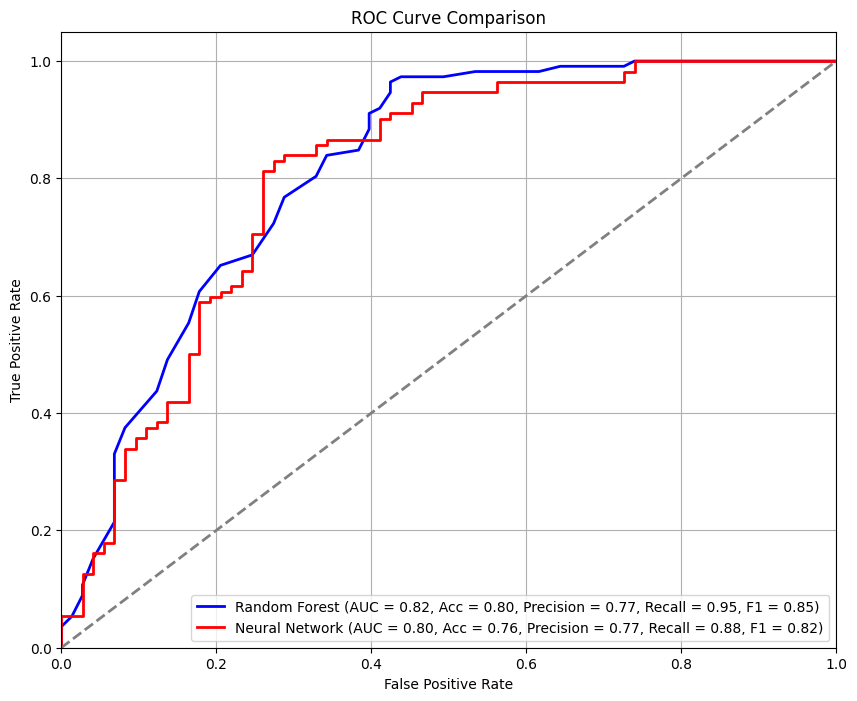

In [37]:
# Convert labels to categorical one-hot encoding for the neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build and train the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))  # Output layer with softmax for classification
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Predictions for Neural Network
y_pred_prob_nn = nn_model.predict(X_test)
y_pred_nn = np.argmax(y_pred_prob_nn, axis=1)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf[:, 1], pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn[:, 1], pos_label=1)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calculate metrics for Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f}, Acc = {accuracy_rf:.2f}, '
                                                     f'Precision = {precision_rf:.2f}, Recall = {recall_rf:.2f}, '
                                                     f'F1 = {f1_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f}, Acc = {accuracy_nn:.2f}, '
                                                  f'Precision = {precision_nn:.2f}, Recall = {recall_nn:.2f}, '
                                                  f'F1 = {f1_nn:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

# **Insights**

* **AUC:** Random Forest (RF) has a slightly higher AUC (0.82 vs 0.80), indicating better overall performance in distinguishing between positive and negative cases across all thresholds.

* **Accuracy**: RF is slightly more accurate (0.80 vs 0.76), meaning it makes fewer incorrect predictions overall.

* **Precision:** RF has slightly higher precision (0.77 vs 0.75), indicating it has a lower false positive rate.

* **Recall:** RF has higher recall (0.95 vs 0.90), indicating it's better at identifying true positives.

* **F1 Score**: RF has a slightly higher F1 score (0.85 vs 0.82), suggesting a better balance between precision and recall.


Overall, Random Forest outperforms the Neural Network (NN) across all these metrics. The higher recall values for both models indicate their strength in identifying positive cases, with RF showing a slight edge in precision and overall performance. This comprehensive evaluation leads to the conclusion that **Random Forest is the preferred model for predicting startup outcomes** in this scenario, given its superior performance across multiple key metrics.

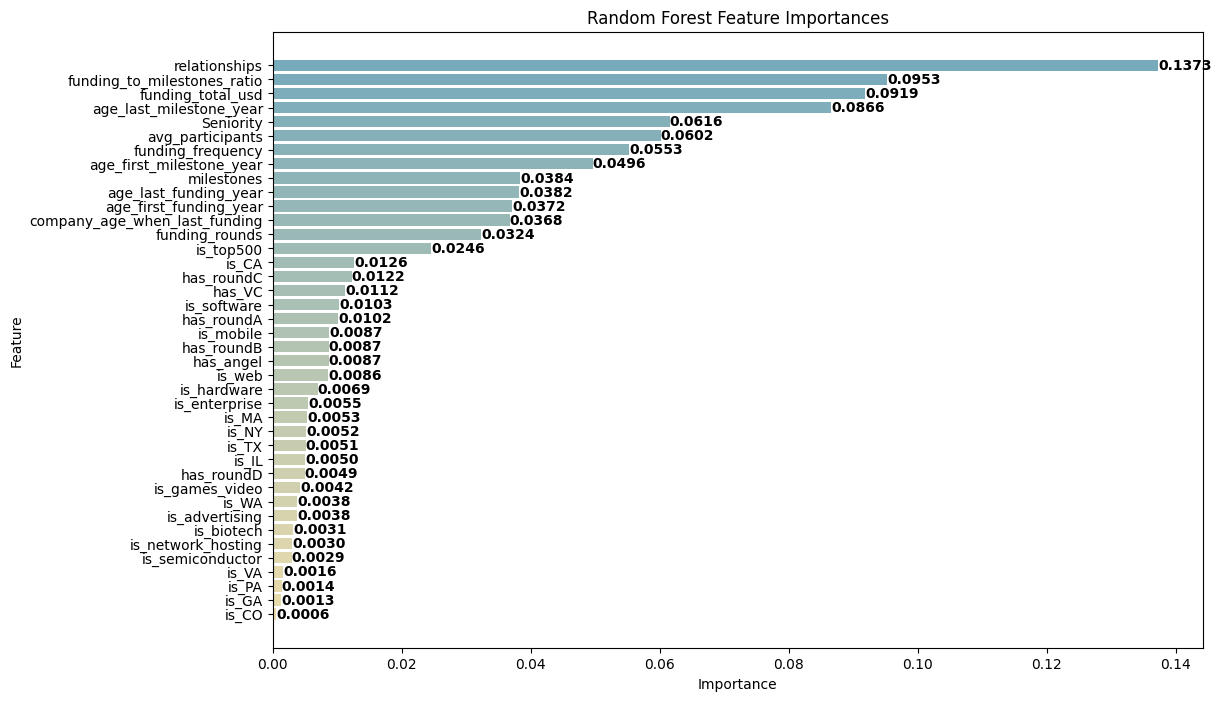

In [38]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for plotting
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Generate a list of colors using the blended palette
cmap = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
colors = [cmap(i / len(feature_importances_df)) for i in range(len(feature_importances_df))]

# Plotting the feature importances
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top

# Adding importance values as notes next to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}', va='center', ha='left', fontsize=10, fontweight='bold')

plt.show()

In [39]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.9 MB/s eta 0:00:00


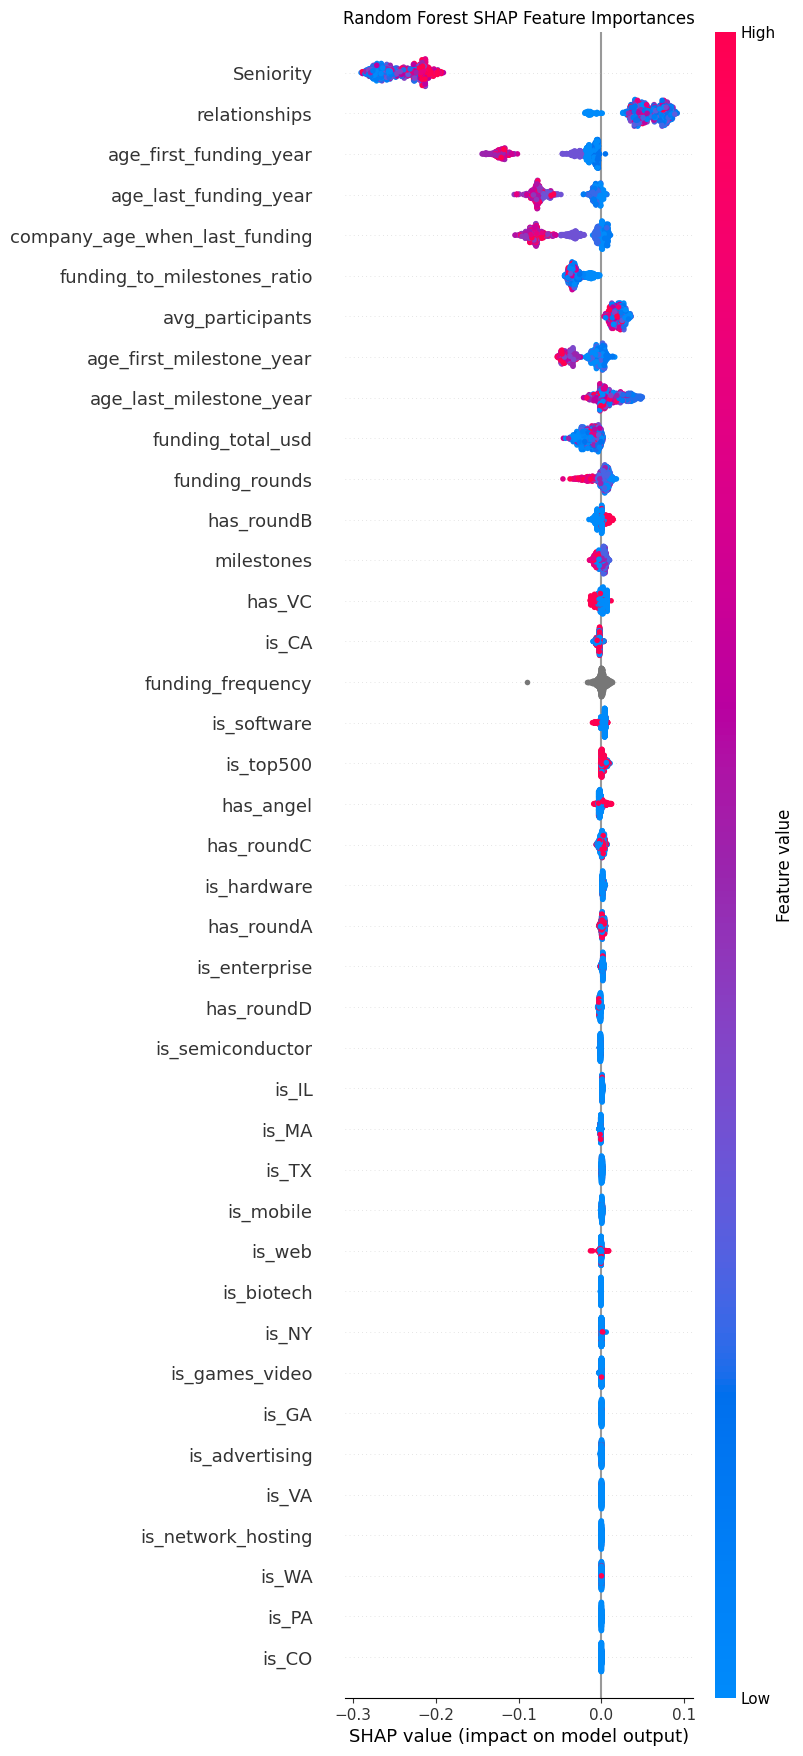

In [40]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)
shap_values_positive_class = shap_values[:, :, 1]
shap.summary_plot(shap_values_positive_class, X, plot_type="dot",max_display=50, show=False)
plt.title("Random Forest SHAP Feature Importances")
plt.show()

# **Insights**

**Top important features:**

1. Both Feature Importances plots show that the most important features are:
    *   relationships
    *   funding_to_milestones_ratio
    *   funding_total_usd
    *   age_last_milestone_year
    *   seniority

2.   **Funding-related features:** Multiple funding-related features (e.g., funding_to_milestones_ratio, funding_total_usd, funding_rounds, funding_frequency) appear to be significant predictors, suggesting that a company's financial aspects are crucial in the model's predictions whether the startup company will be acquired or closed.

3.   **Time-based features:** Several time-related features (e.g., age_last_milestone_year, age_first_funding_year, company_age_when_last_funding) are important, indicating that a company's timeline and development stages play a significant role in the ability of thier startup to be acquired.

4. **SHAP values interpretation:** SHAP plot provides additional insights.
The spread of dots for each feature shows how that feature impacts predictions across different instances. For example, "relationships" has a wide spread, suggesting its impact varies significantly across different companies.

5. **Negative impacts:** The SHAP plot also reveals that some features can have negative impacts on predictions (dots to the left of the center line).

6. **Less important features:** Both plots agree on features with minimal impact, such as geographic indicators (is_CO, is_PA, etc.) and specific industry types (is_network_hosting, is_biotec, etc.).





# **7. Summary of Findings**


**Dataset Overview**
The dataset provides comprehensive insights into various aspects of startup companies, including their geographical locations, financial metrics, industry sectors, funding history, and outcomes (whether they were acquired or closed). Through exploratory data analysis (EDA), we identified significant patterns and correlations that shed light on factors influencing startup success.

**Data Cleaning and Feature Engineering**
1. Data Cleaning: We addressed missing values, removed duplicate and redundant features, and converted relevant columns into appropriate formats (e.g., dates to datetime objects, categorical variables to one-hot encoding).

2. Feature Engineering: Key engineered features included:

  * Company Age: Calculated from the difference between founding year and last funding year.
  * Funding Frequency: Calculated as the number of funding rounds divided by the age of the company.
  * Funding to Milestones Ratio: Ratio of total funding received to the number of milestones achieved.
  
**Insights from Exploratory Data Analysis (EDA)**
1. Geographical Insights: Startups are predominantly located in California (CA), particularly in cities like San Francisco.

2. Temporal Analysis: Most startups were founded between 1995 and 2010, with significant funding activities occurring around 2005-2015.
Startups generally receive their first and last funding rounds within the first decade of their founding.

3. Financial Metrics: Startups varied widely in terms of total funding received, with some outliers receiving exceptionally high amounts.
The number of funding rounds typically ranged from 2 to 4, indicating sustained investor interest in many startups.

4. Status and Attributes: A majority of startups did not acquire. Significant participation in venture capital (VC) funding and angel investments was observed.

5. Technological Domains: Software and web industries dominated among startups, reflecting current technological trends.


**Model Selection and Performance Comparison**
* Model Choice: Random Forest (RF) and Neural Network (NN) were chosen for their ability to handle complex relationships and provide insights into feature importance.
* Performance: RF outperformed NN across various metrics (AUC, accuracy, precision, recall, F1 score), indicating better predictive capability in determining whether a startup would be acquired or closed.

**Feature Importance**

Key Predictive Features:

* Relationships with stakeholders.
* Financial metrics (funding_to_milestones_ratio, funding_total_usd).
* Time-related factors (age_last_milestone_year, company_age_when_last_funding).

Less Impactful Features: Geographic and specific industry indicators showed minimal impact on predictions.

**Further Steps and Improvements**

1. Fine-tuning Random Forest Model: Conduct hyperparameter tuning for the Random Forest model to potentially improve performance.

2. Feature Selection: Explore advanced feature selection techniques (e.g., recursive feature elimination) to enhance model interpretability and efficiency.

3. Interpretability Enhancements: Use SHAP values or similar techniques to provide clearer explanations for model predictions, aiding stakeholders in understanding the drivers of startup success.

4. Dealing with Imbalanced Data: Assess if there's a class distribution imbalance. If imbalance exists, consider combining techniques such as undersampling, oversampling (e.g., SMOTE), algorithmic approaches like ensemble methods, and utilize bootstrapping and cross-validation for robust evaluation.